# Project Overview

This dataset represents transactions that occurred over two days, including 492 fraudulent transactions out of 284,807 total transactions, with 30 features. Specifically, features V1-V28 are the principal components of the raw data, while the 'Time' and 'Amount' columns represent raw data that has not been transformed.

# Set up Environment

In [1]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, 
    mean_absolute_error, mean_squared_error, 
    roc_auc_score, roc_curve, auc, 
    confusion_matrix, recall_score,
    precision_score, f1_score,
    precision_recall_curve
)

from imblearn.metrics import specificity_score
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

CPU times: user 1.17 s, sys: 474 ms, total: 1.64 s
Wall time: 2.67 s


In [2]:
%%time

df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

CPU times: user 2.08 s, sys: 151 ms, total: 2.23 s
Wall time: 3.52 s


In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Exploratory Data Analysis

## Data Overview

In [4]:
%%time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Checking for Missing Values

In [6]:
#total = df.isnull().sum().sort_values(ascending=False)
#percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data[missing_data['Total'] > 0]

## Checking for Data Imbalanced

In [7]:
%%time

print(f"Class value_counts: {df['Class'].value_counts()}")

Class value_counts: Class
0    284315
1       492
Name: count, dtype: int64
CPU times: user 3.49 ms, sys: 107 µs, total: 3.6 ms
Wall time: 4.85 ms


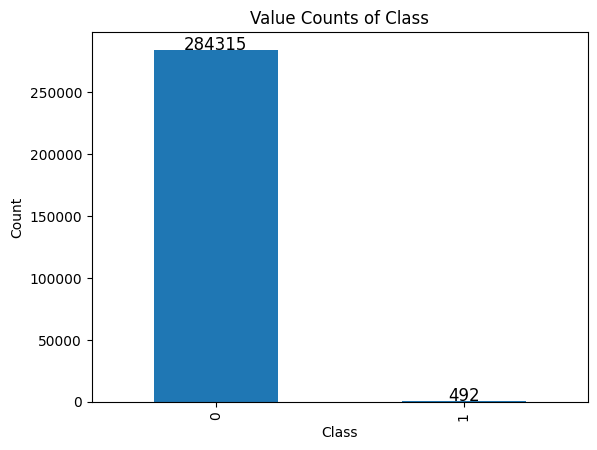

In [8]:
ax = df['Class'].value_counts().plot(kind='bar')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Value Counts of Class')
plt.show()

## Correlation Matrix

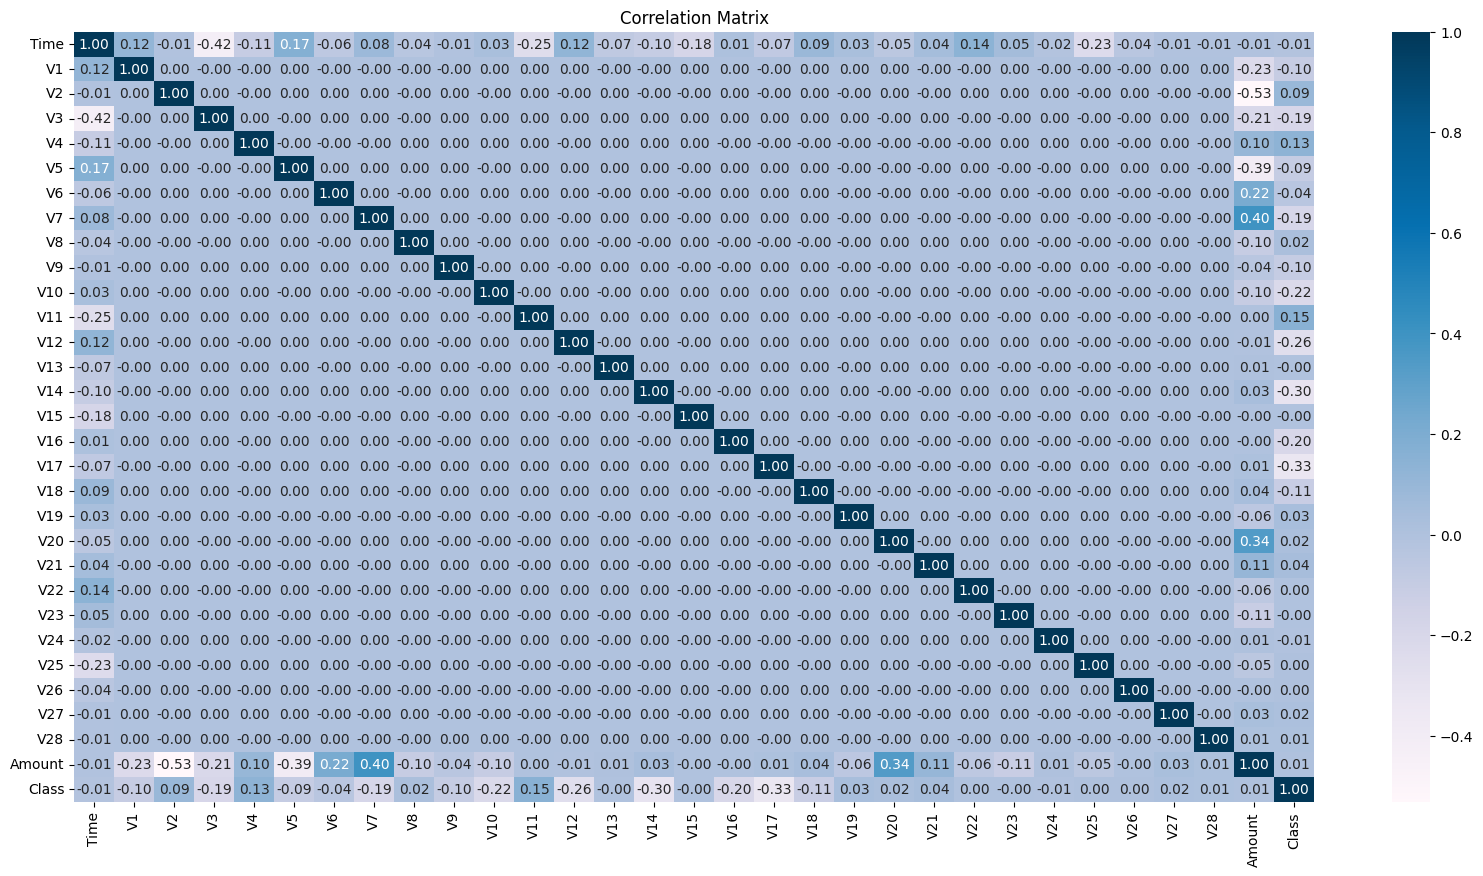

In [9]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='PuBu', fmt=".2f")
plt.title('Correlation Matrix')
plt.savefig("Correlation Matrix.png") 
plt.show()

# Data Preprocessing

In [10]:
%%time

def under_sampling(dataset):
    
    legit_df = dataset[dataset.Class == 0]
    fraud_df = dataset[dataset.Class == 1]
    
    legit_sample = legit_df.sample(n=492)
    
    new_df = pd.concat([legit_sample, fraud_df], axis=0)
    
    new_df = new_df.drop(['Time'], axis=1)
    
    return new_df

under_df = under_sampling(df)

df = df.drop(['Time'], axis=1)

CPU times: user 33 ms, sys: 25 ms, total: 57.9 ms
Wall time: 58.3 ms


# Predictive Model [Imbalanced Dataset]

In [11]:
model_score = []

def plot(y_test, y_pred, y_pred_proba, title: str):
    conf_matrix = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 2, figsize=(22,8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
    ax[0].set_title(f'Confusion matrix {title}')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    
    precision, recall, thresholds  = precision_recall_curve(y_test, y_pred_proba)
    auprc = auc(recall, precision) 
    ax[1].plot(recall, precision, label=f'{title} (area = %0.4f)' % auprc)
    baseline = len(y_test[y_test==1]) / len(y_test)
    ax[1].plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title(f'Precision-Recall Curve of {title}')
    ax[1].legend()

## Splitting Data

In [12]:
X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Logistic Regression

CPU times: user 10.4 s, sys: 4.58 s, total: 14.9 s
Wall time: 3.97 s


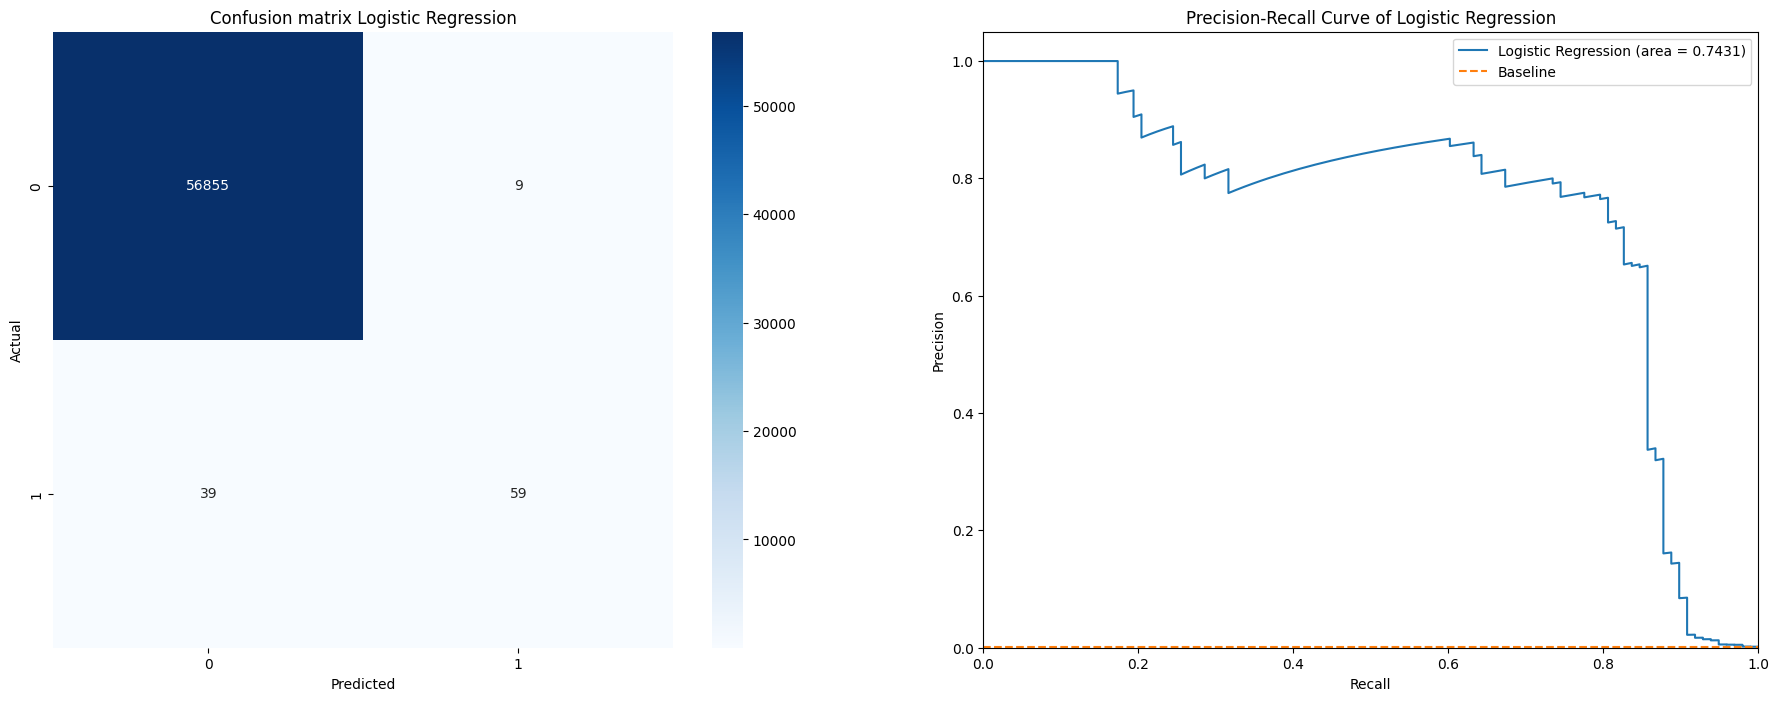

In [13]:
%%time

model_log1 = LogisticRegression()
model_log1.fit(X_train, y_train)
y_pred_log1 = model_log1.predict(X_test)
y_pred_proba_log1 = model_log1.predict_proba(X_test)[:, 1]

precision, recall, thresholds  = precision_recall_curve(y_test, y_pred_proba_log1)
auprc = auc(recall, precision) 
accuracy = accuracy_score(y_test, y_pred_log1)
precision = precision_score(y_test, y_pred_log1, average='macro') # average precision
f1 = f1_score(y_test, y_pred_log1, average='macro') # average f1_score
recall = recall_score(y_test, y_pred_log1, average='macro') # average recall
specificity = specificity_score(y_test, y_pred_log1, average='weighted') # Focused on Class 1

model_score.append(['Logistic Regression (Imbalanced)', auprc, accuracy, precision, f1, recall, specificity])

plot(y_test, y_pred_log1, y_pred_proba_log1, 'Logistic Regression')

In [14]:
print(classification_report(y_test, y_pred_log1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.60      0.71        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



***

## XGBClassifier

CPU times: user 3.35 s, sys: 313 ms, total: 3.66 s
Wall time: 1.64 s


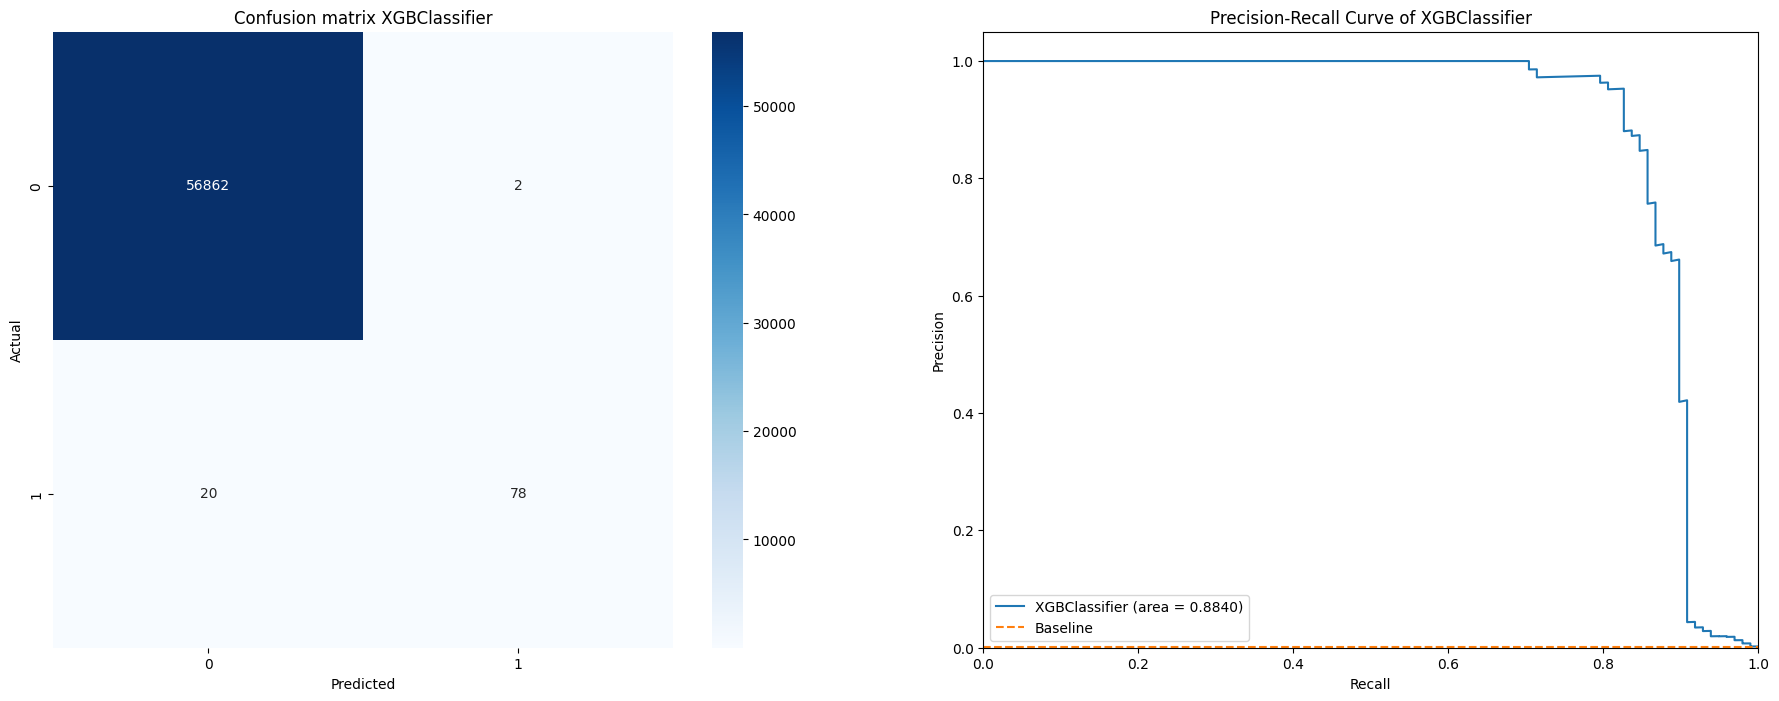

In [15]:
%%time

model_xgb1 = xgb.XGBClassifier(tree_method='gpu_hist')
model_xgb1.fit(X_train, y_train)
y_pred_xgb1 = model_xgb1.predict(X_test)
y_pred_proba_xgb1 = model_xgb1.predict_proba(X_test)[:, 1]

precision, recall, thresholds  = precision_recall_curve(y_test, y_pred_proba_xgb1)
auprc = auc(recall, precision)
accuracy = accuracy_score(y_test, y_pred_xgb1)
precision = precision_score(y_test, y_pred_xgb1, average='macro') # average precision
f1 = f1_score(y_test, y_pred_xgb1, average='macro') # average f1_score
recall = recall_score(y_test, y_pred_xgb1, average='macro') # average recall
specificity = specificity_score(y_test, y_pred_xgb1, average='weighted') # Focused on Class 1

model_score.append(['XGBClassifier (Imbalanced)', auprc, accuracy, precision, f1, recall, specificity])

plot(y_test, y_pred_xgb1, y_pred_proba_xgb1, 'XGBClassifier')

In [16]:
print(classification_report(y_test, y_pred_xgb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



***

## XGBClassifier [scale_pos_weight]

CPU times: user 3.24 s, sys: 175 ms, total: 3.42 s
Wall time: 1.33 s


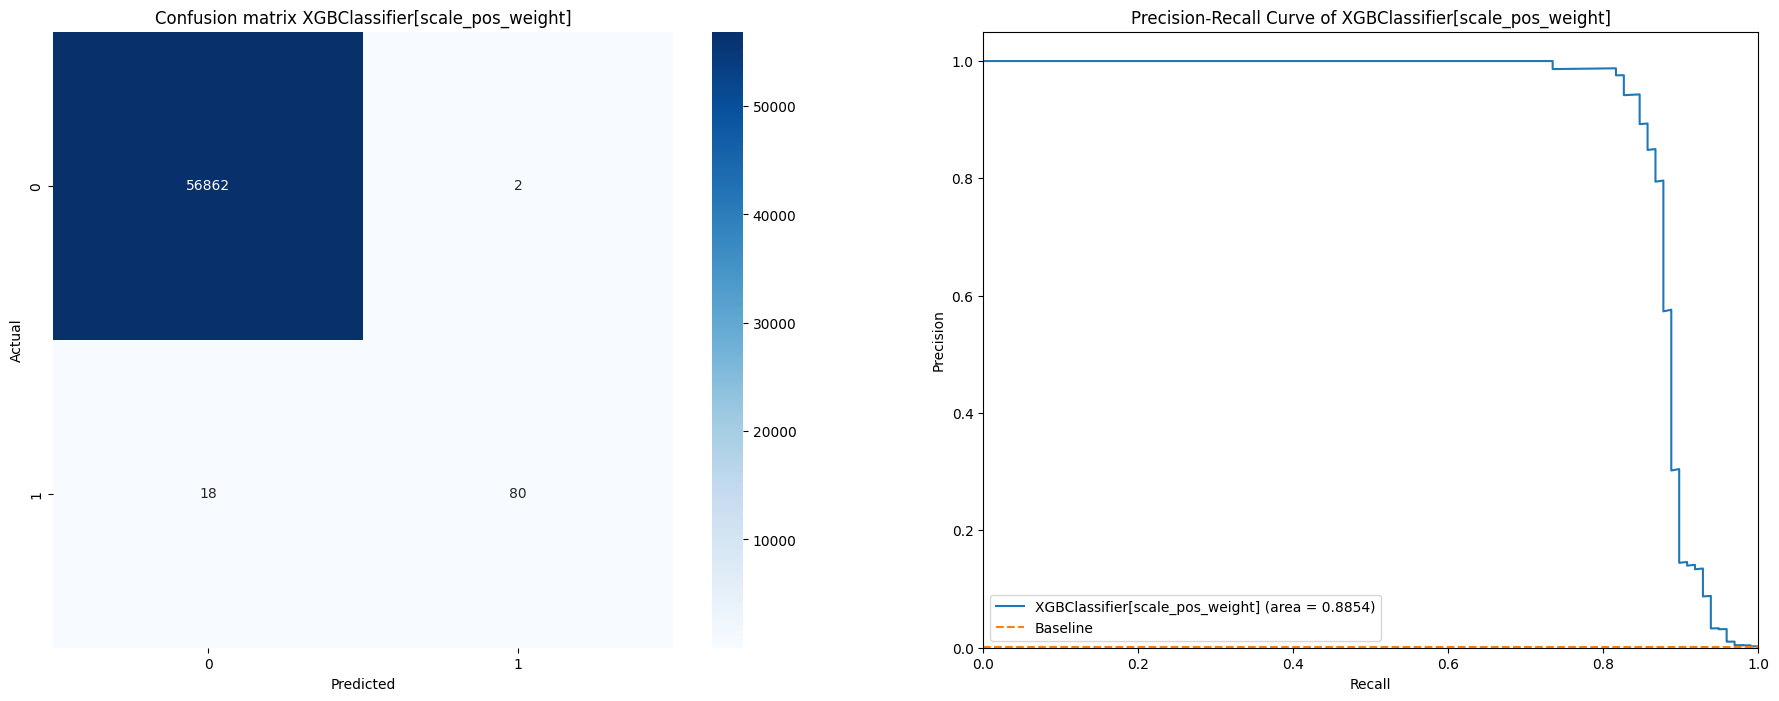

In [17]:
%%time

ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]
model_xgb2 = xgb.XGBClassifier(tree_method='gpu_hist', scale_pos_weight=ratio)
model_xgb2.fit(X_train, y_train)
y_pred_xgb2 = model_xgb2.predict(X_test)
y_pred_proba_xgb2 = model_xgb2.predict_proba(X_test)[:, 1]

precision, recall, thresholds  = precision_recall_curve(y_test, y_pred_proba_xgb2)
auprc = auc(recall, precision) 
accuracy = accuracy_score(y_test, y_pred_xgb2)
precision = precision_score(y_test, y_pred_xgb2, average='macro') # average precision
f1 = f1_score(y_test, y_pred_xgb2, average='macro') # average f1_score
recall = recall_score(y_test, y_pred_xgb2, average='macro') # average recall
specificity = specificity_score(y_test, y_pred_xgb2, average='weighted') # Focused on Class 1

model_score.append(['XGBClassifier[scale_pos_weight] (Imbalanced)', auprc, accuracy, precision, f1, recall, specificity])

plot(y_test, y_pred_xgb2, y_pred_proba_xgb2, 'XGBClassifier[scale_pos_weight]')

In [18]:
print(classification_report(y_test, y_pred_xgb2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.82      0.89        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



***

# Predictive Model [Balanced Dataset]

## SMOTE Technique

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Logistic Regression [SMOTE]

CPU times: user 19.6 s, sys: 7.29 s, total: 26.9 s
Wall time: 7.04 s


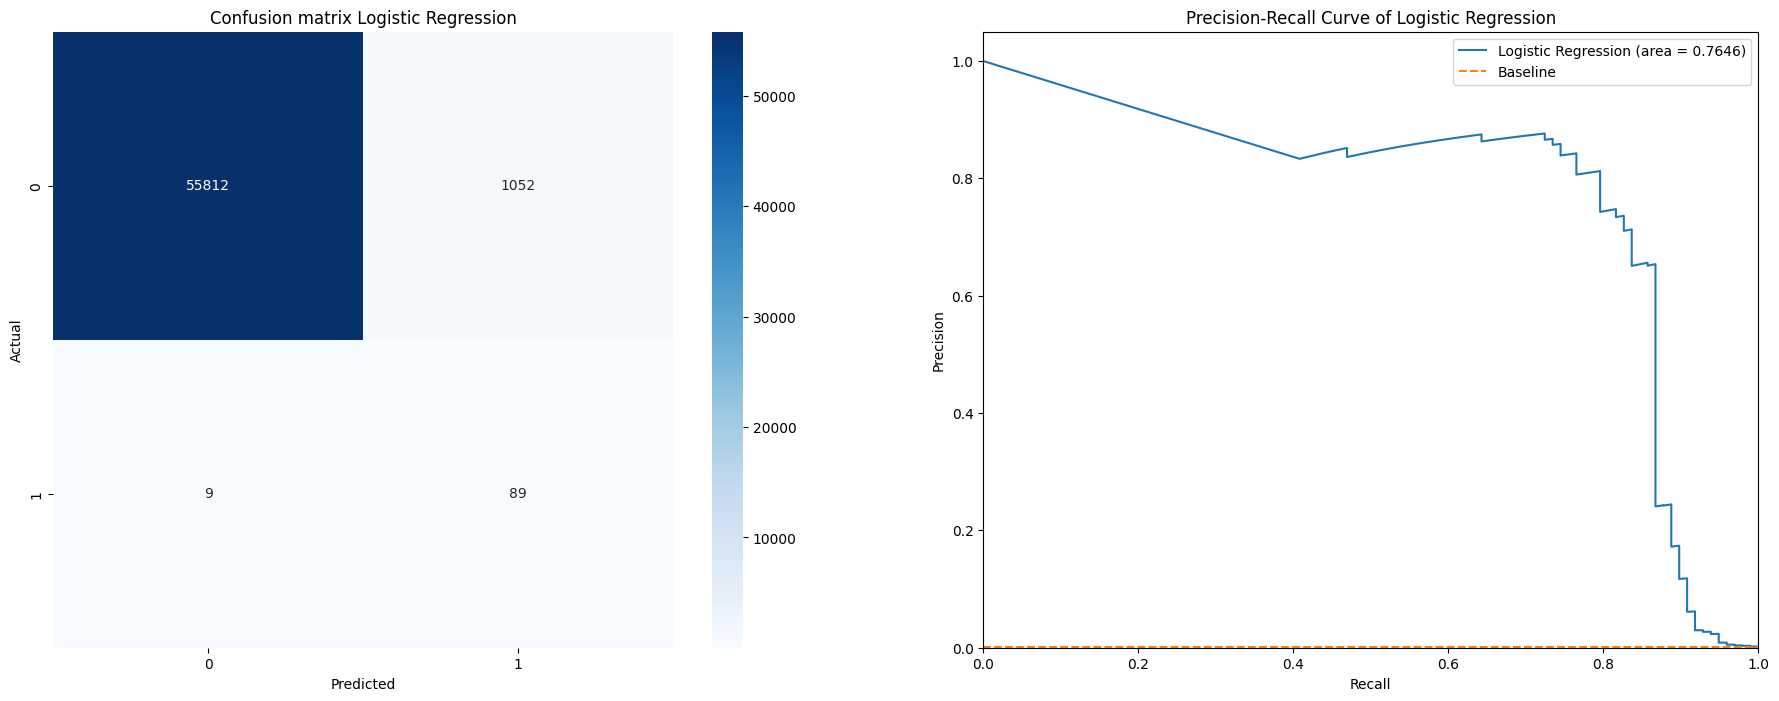

In [20]:
%%time

model_log2 = LogisticRegression()
model_log2.fit(X_resampled, y_resampled)
y_pred_log2 = model_log2.predict(X_test)
y_pred_proba_log2 = model_log2.predict_proba(X_test)[:, 1]

precision, recall, thresholds  = precision_recall_curve(y_test, y_pred_proba_log2)
auprc = auc(recall, precision) 
accuracy = accuracy_score(y_test, y_pred_log2)
precision = precision_score(y_test, y_pred_log2, average='macro') # average precision
f1 = f1_score(y_test, y_pred_log2, average='macro') # average f1_score
recall = recall_score(y_test, y_pred_log2, average='macro') # average recall
specificity = specificity_score(y_test, y_pred_log2, average='weighted') # Focused on Class 1

model_score.append(['Logistic Regression[SMOTE] (Balanced)', auprc, accuracy, precision, f1, recall, specificity])

plot(y_test, y_pred_log2, y_pred_proba_log2, 'Logistic Regression')

In [21]:
print(classification_report(y_test, y_pred_log2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



## XGBClassifier [SMOTE]

CPU times: user 5.8 s, sys: 249 ms, total: 6.05 s
Wall time: 2.31 s


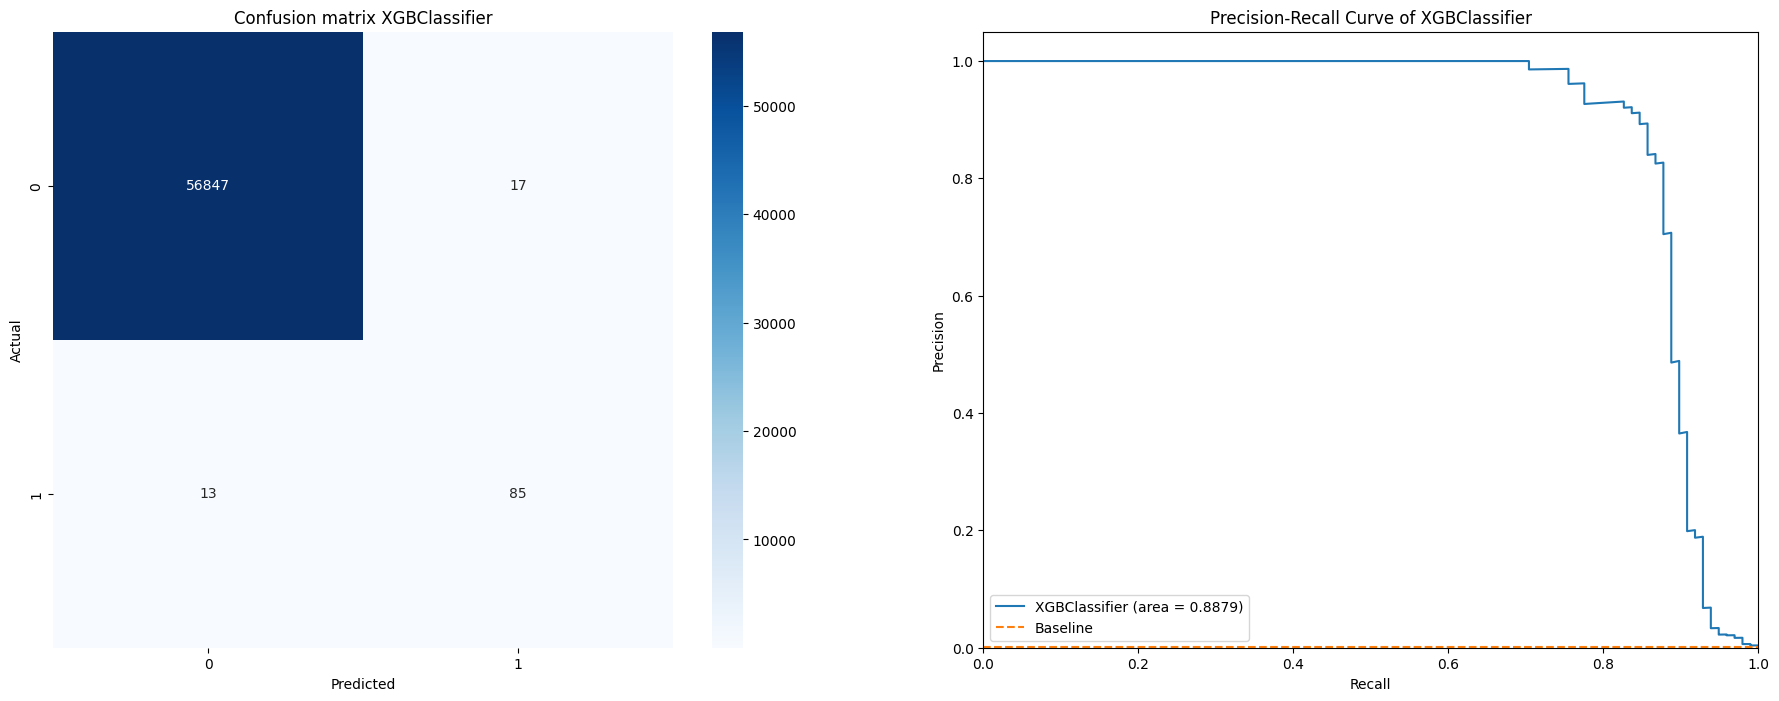

In [22]:
%%time

model_xgb3 = xgb.XGBClassifier(tree_method='gpu_hist')
model_xgb3.fit(X_resampled, y_resampled)
y_pred_xgb3 = model_xgb3.predict(X_test)
y_pred_proba_xgb3 = model_xgb3.predict_proba(X_test)[:, 1]

precision, recall, thresholds  = precision_recall_curve(y_test, y_pred_proba_xgb3)
auprc = auc(recall, precision) 
accuracy = accuracy_score(y_test, y_pred_xgb3)
precision = precision_score(y_test, y_pred_xgb3, average='macro') # average precision
f1 = f1_score(y_test, y_pred_xgb3, average='macro') # average f1_score
recall = recall_score(y_test, y_pred_xgb3, average='macro') # average recall
specificity = specificity_score(y_test, y_pred_xgb3, average='weighted') # Focused on Class 1

model_score.append(['XGBClassifier[SMOTE] (Balanced)', auprc, accuracy, precision, f1, recall, specificity])

plot(y_test, y_pred_xgb3, y_pred_proba_xgb3, 'XGBClassifier')

In [23]:
print(classification_report(y_test, y_pred_xgb3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.87      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



## Under-Sampling Technique

In [24]:
X = under_df.drop(['Class'], axis=1)
y = under_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Logistic Regression [Under-Sampling]

CPU times: user 536 ms, sys: 384 ms, total: 921 ms
Wall time: 261 ms


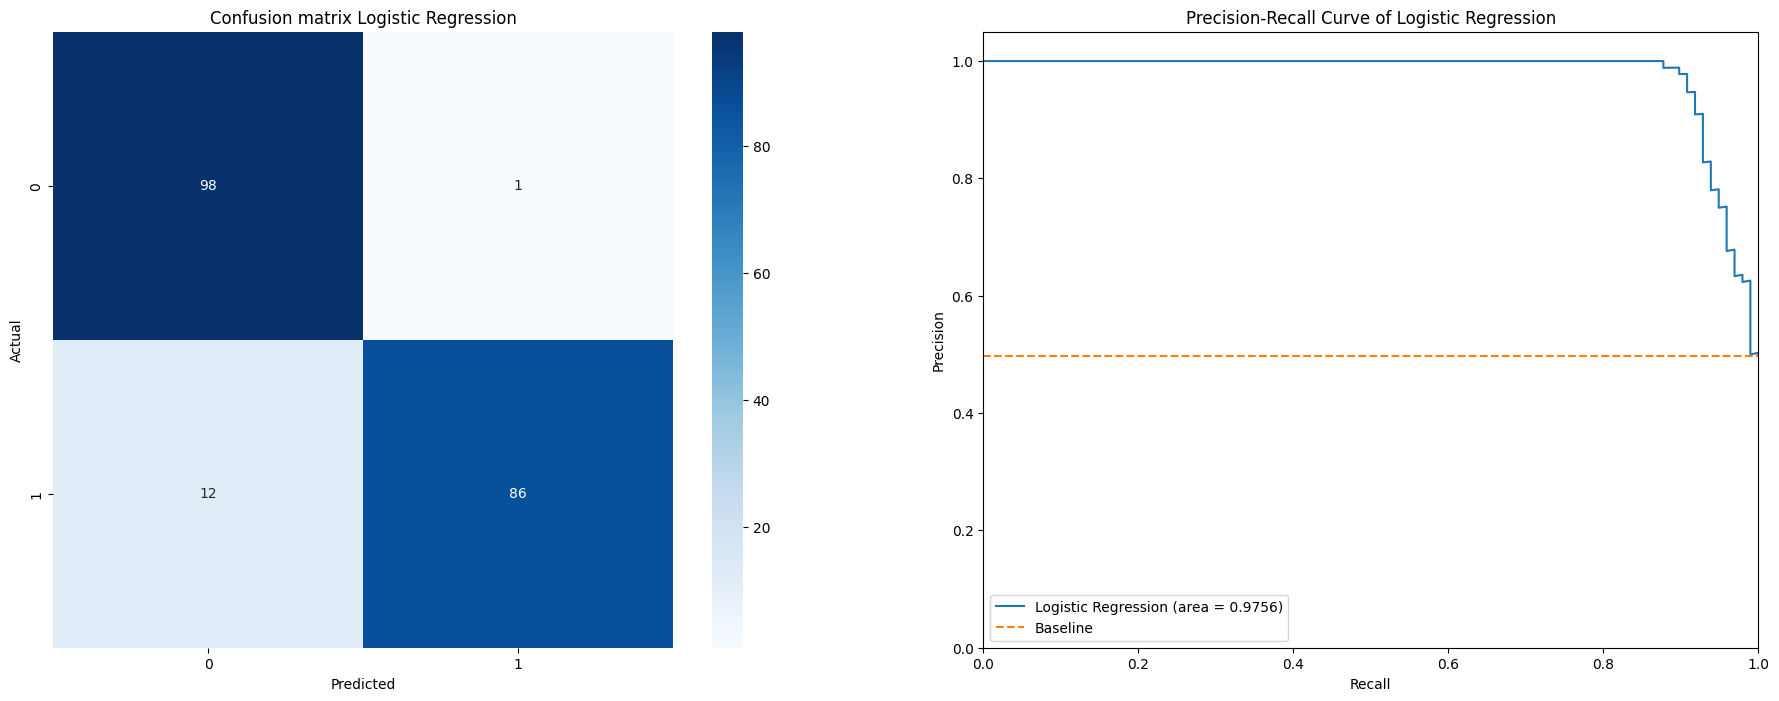

In [25]:
%%time

model_log3 = LogisticRegression()
model_log3.fit(X_train, y_train)
y_pred_log3 = model_log3.predict(X_test)
y_pred_proba_log3 = model_log3.predict_proba(X_test)[:, 1]

precision, recall, thresholds  = precision_recall_curve(y_test, y_pred_proba_log3)
auprc = auc(recall, precision) 
accuracy = accuracy_score(y_test, y_pred_log3)
precision = precision_score(y_test, y_pred_log3, average='macro') # average precision
f1 = f1_score(y_test, y_pred_log3, average='macro') # average f1_score
recall = recall_score(y_test, y_pred_log3, average='macro') # average recall
specificity = specificity_score(y_test, y_pred_log3, average='weighted') # Focused on Class 1

model_score.append(['Logistic Regression[Under-Sampling] (Balanced)', auprc, accuracy, precision, f1, recall, specificity])

plot(y_test, y_pred_log3, y_pred_proba_log3, 'Logistic Regression')

In [26]:
print(classification_report(y_test, y_pred_log3))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



## XGBClassifier [Under-Sampling]

CPU times: user 627 ms, sys: 160 ms, total: 787 ms
Wall time: 367 ms


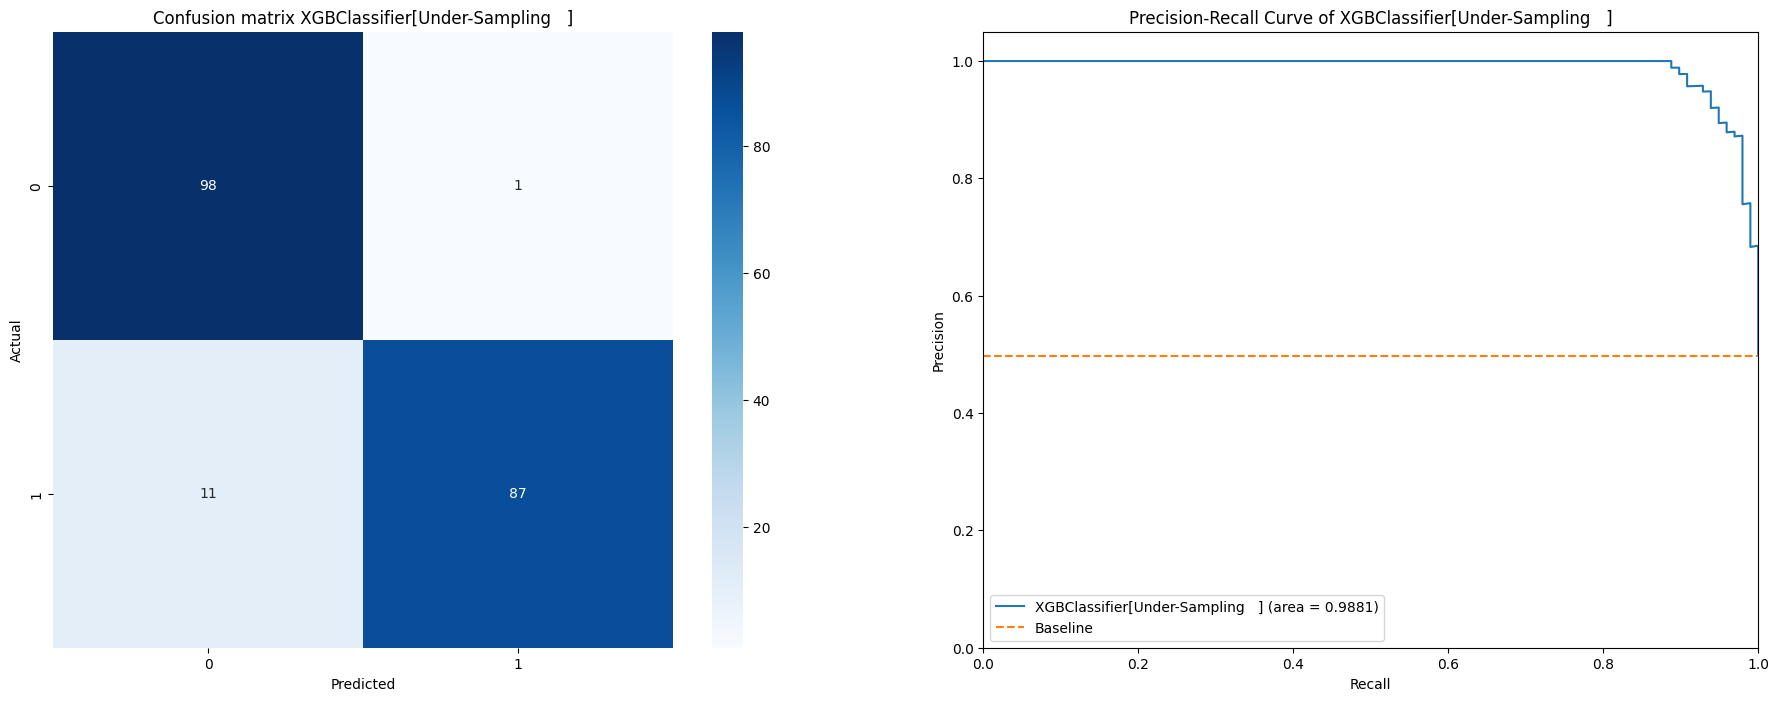

In [27]:
%%time

model_xgb4 = xgb.XGBClassifier(tree_method='gpu_hist')
model_xgb4.fit(X_train, y_train)
y_pred_xgb4 = model_xgb4.predict(X_test)
y_pred_proba_xgb4 = model_xgb4.predict_proba(X_test)[:, 1]

precision, recall, thresholds  = precision_recall_curve(y_test, y_pred_proba_xgb4)
auprc = auc(recall, precision) 
accuracy = accuracy_score(y_test, y_pred_xgb4)
precision = precision_score(y_test, y_pred_xgb4, average='macro') # average precision
f1 = f1_score(y_test, y_pred_xgb4, average='macro') # average f1_score
recall = recall_score(y_test, y_pred_xgb4, average='macro') # average recall
specificity = specificity_score(y_test, y_pred_xgb4, average='weighted') # Focused on Class 1

model_score.append(['XGBClassifier[Under-Sampling] (Balanced)', auprc, accuracy, precision, f1, recall, specificity])

plot(y_test, y_pred_xgb4, y_pred_proba_xgb4, 'XGBClassifier[Under-Sampling   ]')

In [28]:
print(classification_report(y_test, y_pred_xgb4))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        99
           1       0.99      0.89      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



***

# Model Evaluation

![image info](https://www.ninenox.com/wp-content/uploads/2021/09/0_Lj8eoN2JB6vmNYT5.jpg)

In [29]:
df_score = pd.DataFrame(model_score, columns= ['Model', 'Auprc', 'Accuracy', 'Precision', 'F1', 'Recall', 'Specificity'])

In [30]:
df_score.sort_values(by='Recall',ascending=False)

,Model,Auprc,Accuracy,Precision,F1,Recall,Specificity
3,Logistic Regression[SMOTE] (Balanced),0.764625,0.981374,0.538920,0.567124,0.944831,0.908289
6,XGBClassifier[Under-Sampling] (Balanced),0.988133,0.939086,0.943859,0.938896,0.938827,0.938568
5,Logistic Regression[Under-Sampling] (Balanced),0.975605,0.934010,0.939707,0.933764,0.933725,0.933440
4,XGBClassifier[SMOTE] (Balanced),0.887872,0.999473,0.916552,0.924868,0.933524,0.867575
2,XGBClassifier[scale_pos_weight] (Imbalanced),0.885374,0.999649,0.987647,0.944357,0.908146,0.816642
1,XGBClassifier (Imbalanced),0.883984,0.999614,0.987324,0.938106,0.897942,0.796269
0,Logistic Regression (Imbalanced),0.743135,0.999157,0.933481,0.855211,0.800941,0.602725
